In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops


import os
print(os.listdir("data"))

['test.csv', 'train.csv']


In [2]:
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

train_data = train_data.fillna(np.nan)
# train_data.shape, test_data.shape
index_NaN_age = list(train_data["Age"][train_data["Age"].isnull()].index)
for i in index_NaN_age :
    age_med = train_data["Age"].median()
    age_pred = train_data["Age"][((train_data['SibSp'] == train_data.iloc[i]["SibSp"]) & (train_data['Parch'] == train_data.iloc[i]["Parch"]) & (train_data['Pclass'] == train_data.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        train_data['Age'].iloc[i] = age_pred
    else :
        train_data['Age'].iloc[i] = age_med
# min_fare = min(train_data["Age"])
# max_fare = max(train_data["Age"])
# train_data["Age"] = (train_data["Age"]-min_fare)/(max_fare-min_fare)
train_data["Embarked"] = train_data["Embarked"].fillna("S")


test_data = test_data.fillna(np.nan)
# train_data.shape, test_data.shape
index_NaN_age = list(test_data["Age"][test_data["Age"].isnull()].index)
for i in index_NaN_age :
    age_med = test_data["Age"].median()
    age_pred =test_data["Age"][((test_data['SibSp'] == test_data.iloc[i]["SibSp"]) & (test_data['Parch'] == test_data.iloc[i]["Parch"]) & (test_data['Pclass'] == test_data.iloc[i]["Pclass"]))].median()
    if not np.isnan(age_pred) :
        test_data['Age'].iloc[i] = age_pred
    else :
        test_data['Age'].iloc[i] = age_med
# min_fare = min(test_data["Age"])
# max_fare = max(test_data["Age"])
# test_data["Age"] = (test_data["Age"]-min_fare)/(max_fare-min_fare)
test_data["Embarked"] = test_data["Embarked"].fillna("S")

train_data["Ticket"].isnull().sum()

/Users/prabhjot.kaur/Documents/nn-dl/env/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


0

In [3]:
guess_Fare = train_data.Fare.loc[ (train_data.Ticket == '3') & (train_data.Pclass == 3) & (train_data.Embarked == 'S')].median()
train_data.Fare.fillna(guess_Fare , inplace=True)

guess_Fare = test_data.Fare.loc[ (test_data.Ticket == '3') & (test_data.Pclass == 3) & (test_data.Embarked == 'S')].median()
test_data.Fare.fillna(guess_Fare , inplace=True)

train_data['Fare-bin'] = pd.qcut(train_data.Fare,5,labels=[1,2,3,4,5]).astype(int)
test_data['Fare-bin'] = pd.qcut(test_data.Fare,5,labels=[1,2,3,4,5]).astype(int)


In [4]:
train_data['Ticket'] = train_data['Ticket'].map(lambda x: x[0])
train_data["Ticket"]= train_data['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')
# train_data = pd.get_dummies(train_data, columns=["Ticket"])
train_data[:5]
test_data['Ticket'] = test_data['Ticket'].map(lambda x: x[0])
test_data["Ticket"]= test_data['Ticket'].replace(['A','W','F','L','5','6','7','8','9'], '4')
train_data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fare-bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,4,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,P,71.2833,C85,C,5
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,S,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,1,53.1000,C123,S,5
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,3,8.0500,NaN,S,2


In [5]:
train_data['Title'] = train_data.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())
test_data['Title'] = test_data.Name.map( lambda x: x.split(',')[1].split( '.' )[0].strip())

In [6]:
train_data['Title'] = train_data['Title'].replace('Mlle', 'Miss')
train_data['Title'] = train_data['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
train_data.Title.loc[ (train_data.Title !=  'Master') & (train_data.Title !=  'Mr') & (train_data.Title !=  'Miss') 
             & (train_data.Title !=  'Mrs')] = 'Others'

test_data['Title'] = test_data['Title'].replace('Mlle', 'Miss')
test_data['Title'] = test_data['Title'].replace(['Mme','Lady','Ms'], 'Mrs')
test_data.Title.loc[ (test_data.Title !=  'Master') & (test_data.Title !=  'Mr') & (test_data.Title !=  'Miss') 
             & (test_data.Title !=  'Mrs')] = 'Others'

/Users/prabhjot.kaur/Documents/nn-dl/env/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [7]:
train_data = pd.get_dummies(train_data, columns=["Ticket"])
train_data
test_data = pd.get_dummies(test_data, columns=["Ticket"])

train_data = pd.concat([train_data, pd.get_dummies(train_data['Title'])], axis=1).drop(labels=['Name'], axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['Title'])], axis=1).drop(labels=['Name'], axis=1)
test_data.shape

(418, 23)

In [8]:
train_data['Family'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Family'] = test_data['SibSp'] + test_data['Parch'] + 1
train_data[:5]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,...,Ticket_4,Ticket_C,Ticket_P,Ticket_S,Master,Miss,Mr,Mrs,Others,Family
0,1,0,3,male,22.0,1,0,7.2500,NaN,S,...,1,0,0,0,0,0,1,0,0,2
1,2,1,1,female,38.0,1,0,71.2833,C85,C,...,0,0,1,0,0,0,0,1,0,2
2,3,1,3,female,26.0,0,0,7.9250,NaN,S,...,0,0,0,1,0,1,0,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,C123,S,...,0,0,0,0,0,0,0,1,0,2
4,5,0,3,male,35.0,0,0,8.0500,NaN,S,...,0,0,0,0,0,0,1,0,0,1


In [9]:
train_data = train_data.replace(["male", "female"], [0,1])
train_data = train_data.replace(["S", "C", "Q"], [0,1,2])
train_data = train_data.replace(["NaN"],[0])
X = train_data[["Pclass","Sex","Age","Family","Fare-bin","Embarked","Ticket_1","Ticket_2","Ticket_3","Ticket_4","Ticket_C","Ticket_P","Ticket_S","Master","Miss","Mr","Mrs","Others"]]
Y = train_data[["Survived"]]

m1 = X.shape[0] #no of examples

X_train = X[:m1-100]
Y_train = Y[:m1-100]
X_test = X[m1-100: m1]
Y_test = Y[m1-100: m1]

test_data = test_data.replace(["male", "female"], [0,1])
test_data = test_data.replace(["S", "C", "Q"], [0,1,2])
X_predict = test_data[["Pclass","Sex","Age","Family","Fare-bin","Embarked","Ticket_1","Ticket_2","Ticket_3","Ticket_4","Ticket_C","Ticket_P","Ticket_S","Master","Miss","Mr","Mrs","Others"]]


X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_predict.shape 

((791, 18), (791, 1), (100, 18), (100, 1), (418, 18))

In [10]:
X_train = X_train.transpose();
Y_train = Y_train.transpose();
X_test = X_test.transpose();
Y_test = Y_test.transpose();
X_predict = X_predict.transpose();
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape, X_predict.shape

((18, 791), (1, 791), (18, 100), (1, 100), (18, 418))

In [95]:
n_x = 18  #input units
n_h1 = 30 #units in 1st hidden layer
n_h2 = 20 #units in 2nd hidden layer
n_h3 = 10 #units in 3rd hidden layer
n_y = 1 #output units

In [96]:
def create_placeholders(n_x, n_y):
    X = tf.placeholder(tf.float32, [n_x, None], name = 'X')
    Y = tf.placeholder(tf.float32, [n_y, None], name = 'Y')

    return X,Y

In [97]:
def intialize_params():
    W1 = tf.get_variable("W1", [n_h1,n_x], initializer= tf.contrib.layers.xavier_initializer(seed=1) )
    b1 = tf.get_variable("b1", [n_h1, 1], initializer= tf.zeros_initializer())
    W2 = tf.get_variable("W2", [n_h2,n_h1], initializer= tf.contrib.layers.xavier_initializer(seed=1) )
    b2 = tf.get_variable("b2", [n_h2, 1], initializer= tf.zeros_initializer())
    W3 = tf.get_variable("W3", [n_h3,n_h2], initializer= tf.contrib.layers.xavier_initializer(seed=1) )
    b3 = tf.get_variable("b3", [n_h3, 1], initializer= tf.zeros_initializer())
    W4 = tf.get_variable("W4", [n_y,n_h3], initializer= tf.contrib.layers.xavier_initializer(seed=1) )
    b4 = tf.get_variable("b4", [n_y, 1], initializer= tf.zeros_initializer())
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3,
        "W4": W4,
        "b4": b4
    }
    return parameters

In [98]:
def forward_prop(X, parameters, keep_prob):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    W4 = parameters['W4']
    b4 = parameters['b4']
    
    Z1 = tf.add(tf.matmul(W1, X), b1)
    A1 = tf.nn.relu(Z1)
     # apply DropOut to hidden layer
    drop_out = tf.nn.dropout(A1, keep_prob)  # DROP-OUT here
    Z2 = tf.add(tf.matmul(W2, drop_out), b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3)
    A3 = tf.nn.relu(Z3)
    Z4 = tf.add(tf.matmul(W4, A3), b4)
    A4 = tf.sigmoid(Z4)
    
    return A4

In [99]:
def compute_cost(A3, Y):
    logits  = tf.transpose(A3)
    labels = tf.transpose(Y) 
    
    cost = tf.losses.mean_squared_error(labels=labels, predictions=logits)
    
    return cost

In [100]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.01, num_epochs = 2000, print_cost = True):
    ops.reset_default_graph()
    tf.set_random_seed(1)
    seed=3
    
    [n_x, m] = X_train.shape
    n_y = Y_train.shape[0]
    
    costs= []
    
    X, Y = create_placeholders(n_x, n_y)
    
    keep_prob = tf.placeholder(tf.float32)
    
    parameters = intialize_params()
    
    A3 = forward_prop(X, parameters, keep_prob)
    
    cost = compute_cost(A3, Y)
    
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(num_epochs):
            epoch_cost = 0
            _, epoch_cost = sess.run([optimizer, cost], feed_dict={X:X_train, Y: Y_train, keep_prob : 0.5})
            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()

        parameters = sess.run(parameters)
        
        correct_prediction = tf.equal(tf.round(A3), Y)
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train, keep_prob : 1.0}))
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test, keep_prob : 1.0}))
        
        return parameters

Cost after epoch 0: 0.392014
Cost after epoch 100: 0.134111
Cost after epoch 200: 0.119562
Cost after epoch 300: 0.114434
Cost after epoch 400: 0.114974
Cost after epoch 500: 0.114049
Cost after epoch 600: 0.113469
Cost after epoch 700: 0.110995
Cost after epoch 800: 0.107096
Cost after epoch 900: 0.104779
Cost after epoch 1000: 0.108227
Cost after epoch 1100: 0.104073
Cost after epoch 1200: 0.105877
Cost after epoch 1300: 0.108321
Cost after epoch 1400: 0.106541
Cost after epoch 1500: 0.108172
Cost after epoch 1600: 0.106848
Cost after epoch 1700: 0.103654
Cost after epoch 1800: 0.099315
Cost after epoch 1900: 0.102754


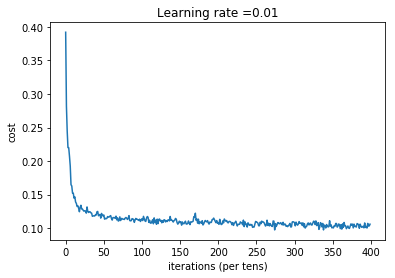

Train Accuracy: 0.874842
Test Accuracy: 0.86


In [101]:
parameters = model(X_train, Y_train, X_test, Y_test)

In [102]:
def predict(X_predict, parameters):
    X, Y = create_placeholders(n_x, n_y)
    keep_prob = tf.placeholder(tf.float32)
    Y_pred = tf.cast(tf.round(forward_prop(X, parameters, keep_prob)), tf.int32) 
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        Y_pred = sess.run(Y_pred, feed_dict={X:X_predict, keep_prob:1.0})
        print('y: ', Y_pred)
        
    return Y_pred  

In [103]:
predictions = predict(X_predict, parameters)
predictions.shape

y:  [[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0
  0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 1
  1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
  1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
  1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
  0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
  0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 0 1 0 0 0 1 0 0 0 0 0 1
  0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0
  1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
  0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
  0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0
  0 1 1 1 1 1 0 1 0 0 1]]


(1, 418)

In [104]:
index = test_data["PassengerId"]
predictions = predictions.transpose().reshape(test_data["PassengerId"].shape)
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": predictions
    })

In [105]:
submission.to_csv('./output/submission.csv', index=False)